# DATA5000 Workshop #2 Notebook on Forecasting

# ***NeuralProphet:***

## https://neuralprophet.com/

# ***Presentation***
## https://github.com/ourownstory/neural_prophet/blob/main/notes/NeuralProphet_Introduction.pdf

### ***The research paper:***
## https://arxiv.org/abs/2111.15397

### ***Facebook Prophet***, which set an industry standard for explainable, scalable, and user-friendly forecasting frameworks: https://facebook.github.io/prophet/

### But Prophet is a statistical method - NOT a Neural Network-based Model

### ***Prophet*** also lacks understanding of "local context": which is essential for forecasting the near-term future.

### The lack of local context, which is essential for forecasting the nearterm future, has restricted the usefulness of Prophet in industrial applications.


### ***Readings***:

* https://towardsdatascience.com/in-depth-understanding-of-neuralprophet-through-a-complete-example-2474f675bc96

* https://towardsdatascience.com/prophet-vs-neuralprophet-fc717ab7a9d8


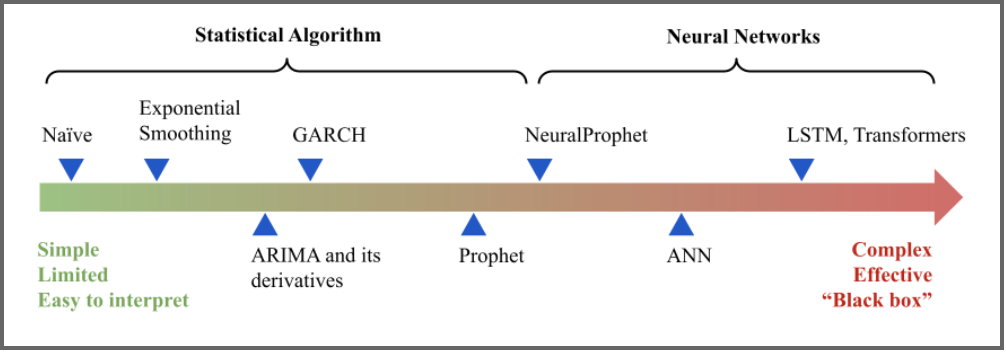

#***LOCAL CONTEXT***

### ***A local context is:*** the near-term future depends on the current state of the system. The majority of time series forecasting exhibits those dynamics, evidenced in scenarios related to energy consumption, traffic patterns, air quality measures, and much more. For example, when there’s a strong uptick in server load, it might have been triggered by a recent event that could continue for prolonged periods, which should be reflected in near-term forecasts.

### For short to medium-term forecasts, NeuralProphet improves forecast accuracy by 55 to 92 percent

## What is a Neural Network? https://www.ibm.com/cloud/learn/neural-networks

# ***TIME IN NEURAL PROPHET***
### Pandas Time Series: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

#***What is a Neural Network?***
## What is a Neural Network? https://www.ibm.com/cloud/learn/neural-networks

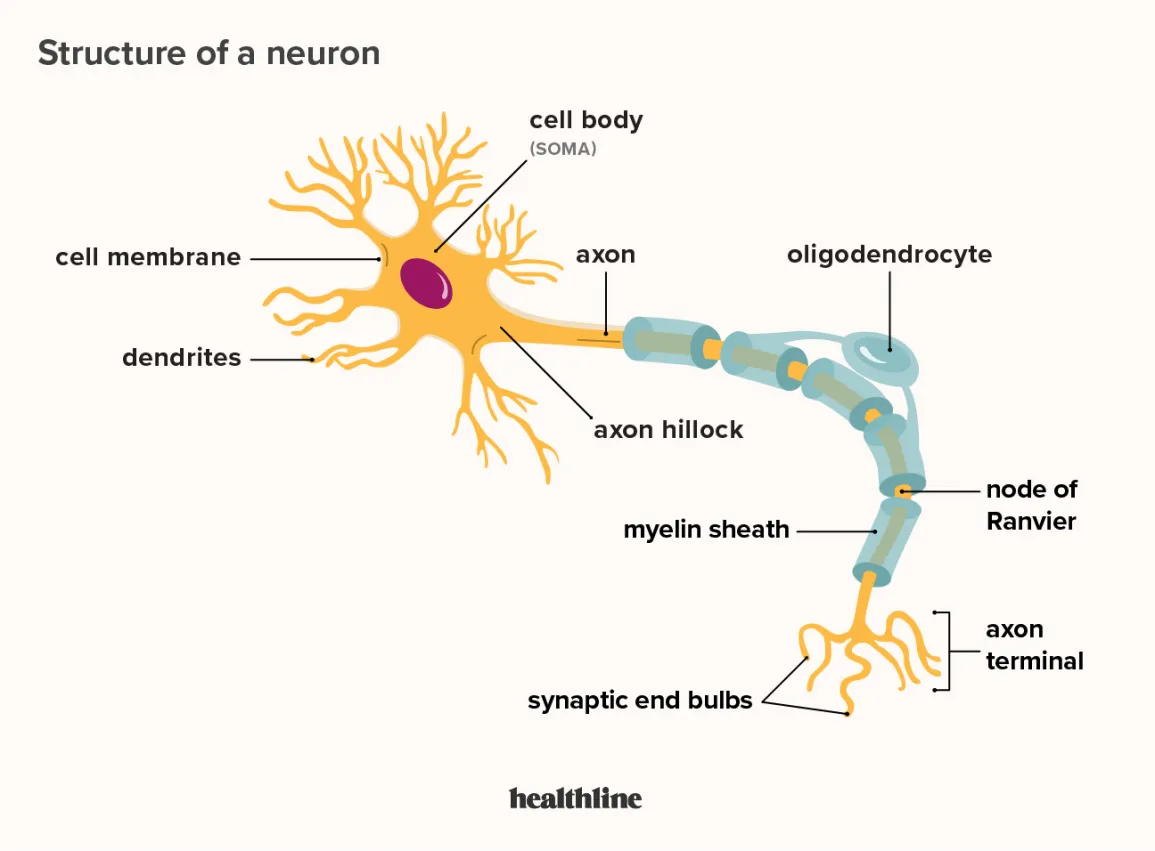

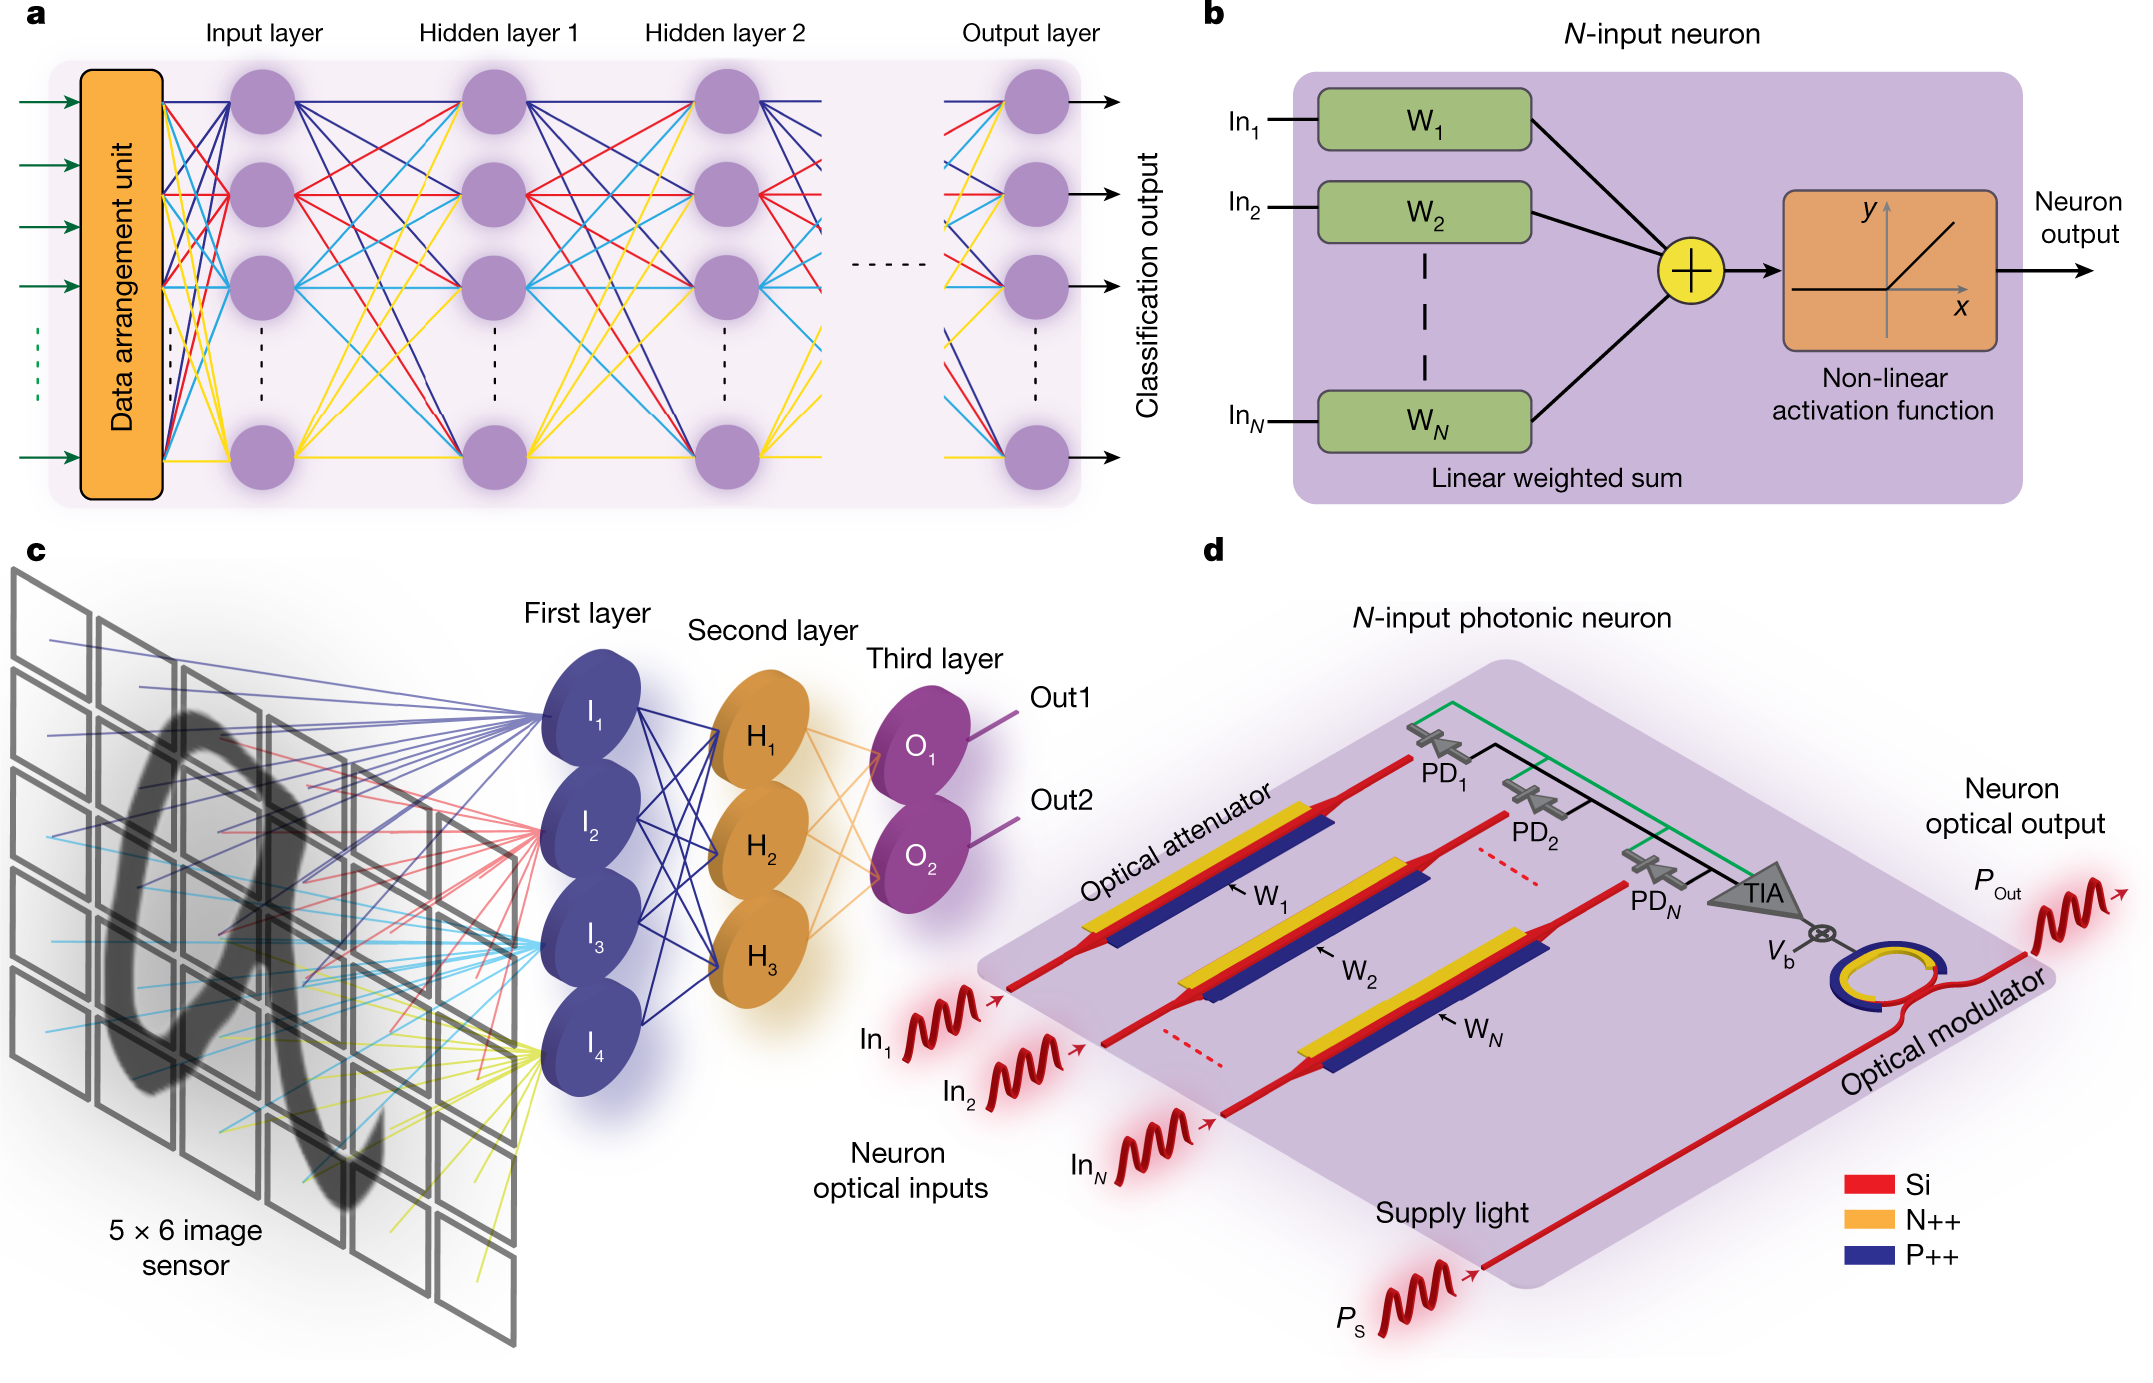

# ***Running NeuralProphet***

# STEP 1: Install Libraries

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [kaleido]


In [3]:
!pip install neuralprophet['live'] torch==2.5 torchvision torchaudio

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 23.7 MB/s  0:00:30
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 38.6 MB/s  0:00:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 166.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s  0:00:00
   ━━━━━━━

In [ ]:
# Restart colab session

### Import installed libraries

In [1]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#STEP 2: Basic NeuralProphet on Test Data

In [3]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv", dayfirst=True)

In [4]:
df

,ds,y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837
3,2007-12-13,8.0725
4,2007-12-14,7.8936
...,...,...
2959,2016-01-16,7.8172
2960,2016-01-17,9.2739
2961,2016-01-18,10.3338
2962,2016-01-19,9.1259


# Create NeuralProphet

In [5]:
# epochs - how many generations to learn
example_model = NeuralProphet(quantiles=[0.02, 0.98], epochs=10)

# Model training - make sure that the frequency of the time series is correctly coded

In [6]:
example_model_metrics = example_model.fit(df, freq="D", progress='plot-all')

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alte

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  retur

Training: 0it [00:00, ?it/s]

In [ ]:
example_model_future = example_model.make_future_dataframe(df, periods=365, n_historic_predictions=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alte

In [ ]:
example_model_forecast = example_model.predict(example_model_future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alte

Predicting: 47it [00:00, ?it/s]

In [ ]:
example_model_forecast

,ds,y,yhat1,yhat1 2.0%,yhat1 98.0%,trend,season_yearly,season_weekly
0,2007-12-10,9.5908,8.334138,2.372898,10.848393,7.626585,0.376041,0.331512
1,2007-12-11,8.5196,8.113779,3.531566,10.127487,7.627160,0.371824,0.114796
2,2007-12-12,8.1837,7.935189,3.335600,9.739123,7.627735,0.368837,-0.061383
3,2007-12-13,8.0725,7.928705,2.077855,9.837107,7.628310,0.367211,-0.066817
4,2007-12-14,7.8936,7.938472,3.267836,9.702391,7.628886,0.367061,-0.057475
...,...,...,...,...,...,...,...,...
3324,2017-01-15,NaN,8.295275,8.227965,9.524511,7.201112,1.044845,0.049318
3325,2017-01-16,NaN,8.589346,7.400853,9.652885,7.200156,1.057637,0.331552
3326,2017-01-17,NaN,8.381798,8.381798,9.022187,7.199201,1.067674,0.114923
3327,2017-01-18,NaN,8.211693,8.211693,8.717813,7.198245,1.074819,-0.061371


# Save forecast data to csv file

In [ ]:
example_model_forecast.to_csv('example_model_neuralprophet_forecast.csv')

# Use Plotly to show chart of forecasts: https://plotly.com/python/setting-graph-size/


In [ ]:
visual_example_model = example_model.plot(example_model_forecast)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

  ds = fcst["ds"].dt.to_pydatetime()



In [ ]:
visual_example_model

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.







This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.





In [ ]:
import plotly.express as px

In [ ]:
df_vis = example_model_forecast
fig = px.line(df_vis, x="ds", y="yhat1",
                 width=800, height=400)
fig

# ***Forecast on Project Data***

# Forecast Australian Inflation Rate

## Explaination about inflation: https://www.rba.gov.au/education/resources/explainers/inflation-and-its-measurement.html



# STEP 2: Load Data

In [ ]:
df = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/aus_cpi.csv', dayfirst=True)

In [ ]:
df

,Date,AU-CPI
0,1/1/1960,2.73973
1,1/4/1960,4.10959
2,1/7/1960,4.05405
3,1/10/1960,4.00000
4,1/1/1961,4.00000
...,...,...
249,1/4/2022,6.14478
250,1/7/2022,7.26817
251,1/10/2022,7.83182
252,1/1/2023,7.02179


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    254 non-null    object 
 1   AU-CPI  254 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


# STEP 3: Pre-process Time Series

In [ ]:
df.Date

,Date
0,1/1/1960
1,1/4/1960
2,1/7/1960
3,1/10/1960
4,1/1/1961
...,...
249,1/4/2022
250,1/7/2022
251,1/10/2022
252,1/1/2023


### Convert Date String to True Datetimes

In [ ]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    254 non-null    datetime64[ns]
 1   AU-CPI  254 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


### Make Date the Index of the Dataset

In [ ]:
df = df.set_index(df.Date)

In [ ]:
df

,Date,AU-CPI
Date,,
1960-01-01,1960-01-01,2.73973
1960-01-04,1960-01-04,4.10959
1960-01-07,1960-01-07,4.05405
1960-01-10,1960-01-10,4.00000
1961-01-01,1961-01-01,4.00000
...,...,...
2022-01-04,2022-01-04,6.14478
2022-01-07,2022-01-07,7.26817
2022-01-10,2022-01-10,7.83182


In [ ]:
data = df[['Date', 'AU-CPI']]
data

,Date,AU-CPI
Date,,
1960-01-01,1960-01-01,2.73973
1960-01-04,1960-01-04,4.10959
1960-01-07,1960-01-07,4.05405
1960-01-10,1960-01-10,4.00000
1961-01-01,1961-01-01,4.00000
...,...,...
2022-01-04,2022-01-04,6.14478
2022-01-07,2022-01-07,7.26817
2022-01-10,2022-01-10,7.83182


In [ ]:
data.rename(columns={"Date":"ds", "AU-CPI":"y"}, inplace=True)

In [ ]:
data

,ds,y
Date,,
1960-01-01,1960-01-01,2.73973
1960-01-04,1960-01-04,4.10959
1960-01-07,1960-01-07,4.05405
1960-01-10,1960-01-10,4.00000
1961-01-01,1961-01-01,4.00000
...,...,...
2022-01-04,2022-01-04,6.14478
2022-01-07,2022-01-07,7.26817
2022-01-10,2022-01-10,7.83182


#STEP 4: Forecasting - Neural Network (NeuralProphet)

## Note: do not run the code immediately below - it is here only for reference on the parameters

In [ ]:
# DO NOT RUN - this is put here to show the parameters that are available for adjustment
class neuralprophet.forecaster.NeuralProphet(growth: Literal['off', 'linear', 'discontinuous'] = 'linear',
                                             changepoints: Optional[list] = None,
                                             n_changepoints: int = 10,
                                             changepoints_range: float = 0.8,
                                             trend_reg: float = 0,
                                             trend_reg_threshold: Optional[Union[bool, float]] = False,
                                             trend_global_local: str = 'global',
                                             yearly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             weekly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             daily_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             seasonality_mode: Literal['additive', 'multiplicative'] = 'additive',
                                             seasonality_reg: float = 0, season_global_local: Literal['global', 'local'] = 'global',
                                             n_forecasts: int = 1,
                                             n_lags: int = 0,
                                             ar_layers: Optional[list] = [],
                                             ar_reg: Optional[float] = None,
                                             lagged_reg_layers: Optional[list] = [],
                                             learning_rate: Optional[float] = None,
                                             epochs: Optional[int] = None,
                                             batch_size: Optional[int] = None,
                                             loss_func: Union[str, torch.nn.modules.loss._Loss, Callable] = 'Huber',
                                             optimizer: Union[str, Type[torch.optim.optimizer.Optimizer]] = 'AdamW',
                                             newer_samples_weight: float = 2,
                                             newer_samples_start: float = 0.0,
                                             quantiles: List[float] = [],
                                             impute_missing: bool = True,
                                             impute_linear: int = 10,
                                             impute_rolling: int = 10,
                                             drop_missing: bool = False,
                                             collect_metrics: Union[List[str], bool, Dict[str, torchmetrics.metric.Metric]] = True,
                                             normalize: Literal['auto', 'soft', 'soft1', 'minmax', 'standardize', 'off'] = 'auto',
                                             global_normalization: bool = False,
                                             global_time_normalization: bool = True,
                                             unknown_data_normalization: bool = False,
                                             accelerator: Optional[str] = None,
                                             trainer_config: dict = {},
                                             prediction_frequency: Optional[dict] = None)

### ADAM optimiser https://keras.io/api/optimizers/adam/

In [ ]:
aus_cpi_model = NeuralProphet(
    epochs = 100,
    loss_func = "Huber",
    optimizer = "AdamW"
)

In [ ]:
# Use static plotly in notebooks
aus_cpi_model.set_plotting_backend("plotly-static")

### Split data into training and validation

In [ ]:
# note the code for the frequency of the time series
df_train, df_val = aus_cpi_model.split_df(data, valid_p = 0.20, freq='Q')

In [ ]:
df_train

,ds,y
Date,,
1960-01-01,1960-01-01,2.73973
1960-01-04,1960-01-04,4.10959
1960-01-07,1960-01-07,4.05405
1960-01-10,1960-01-10,4.00000
1961-01-01,1961-01-01,4.00000
...,...,...
2009-01-10,2009-01-10,2.05628
2010-01-01,2010-01-01,2.91892
2010-01-04,2010-01-04,3.12164


In [ ]:
# plot
fig_df_train = px.line(df_train, x="ds", y="y",
                 width=800, height=400)
fig_df_train

# Validation data is used by NeuralProphet to measure its performance and make adjustments to parameters.

In [ ]:
df_val

,ds,y
Date,,
2011-01-01,2011-01-01,3.25630
2011-01-04,2011-01-04,3.54906
2011-01-07,2011-01-07,3.41969
2011-01-10,2011-01-10,2.99278
2012-01-01,2012-01-01,1.62767
2012-01-04,2012-01-04,1.20968
2012-01-07,2012-01-07,2.00401
2012-01-10,2012-01-10,2.20441
2013-01-01,2013-01-01,2.50250


### Training

In [ ]:
aus_cpi_metrics = aus_cpi_model.fit(df_train, validation_df=df_val, progress='plot-all')

Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
aus_cpi_metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,10.717373,13.114659,0.370186,0.0,0,19.442207,22.063017,0.613372,0.0
1,10.555820,12.896206,0.359406,0.0,1,19.315460,22.124104,0.607766,0.0
2,10.301929,12.543524,0.342349,0.0,2,18.918612,21.692715,0.589689,0.0
3,9.916883,12.004103,0.316921,0.0,3,18.450413,21.254219,0.568619,0.0
4,9.424645,11.269587,0.283608,0.0,4,17.623005,20.530283,0.531824,0.0
...,...,...,...,...,...,...,...,...,...
95,1.271151,1.805478,0.007693,0.0,95,2.684888,3.309776,0.017043,0.0
96,1.272139,1.805556,0.007694,0.0,96,2.672457,3.324682,0.016860,0.0
97,1.272324,1.805573,0.007694,0.0,97,2.681158,3.330603,0.016943,0.0
98,1.272443,1.805555,0.007694,0.0,98,2.665202,3.280367,0.016785,0.0


In [ ]:
aus_cpi_metrics.to_csv('aus_cpi_metrics.csv')

# Forecasting

## We shall forecast 2 quarters into the future

In [ ]:
aus_cpi_future_time = aus_cpi_model.make_future_dataframe(df=data, n_historic_predictions=True, periods=365)

In [ ]:
aus_cpi_future_time

,ds,y
0,1960-01-01,2.73973
1,1960-01-04,4.10959
2,1960-01-07,4.05405
3,1960-01-10,4.00000
4,1961-01-01,4.00000
...,...,...
614,2025-12-22,NaN
615,2025-12-25,NaN
616,2025-12-28,NaN
617,2025-12-31,NaN


In [ ]:
aus_cpi_forecast = aus_cpi_model.predict(df=aus_cpi_future_time)

Predicting: 13it [00:00, ?it/s]

In [ ]:
aus_cpi_forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,1960-01-01,2.73973,7.418993,21.729172,-14.237179,-0.073000
1,1960-01-04,4.10959,6.895843,21.727982,-14.998358,0.166219
2,1960-01-07,4.05405,6.796269,21.726793,-15.100097,0.169573
3,1960-01-10,4.00000,6.820265,21.725603,-14.586423,-0.318915
4,1961-01-01,4.00000,6.775520,21.584023,-14.489593,-0.318911
...,...,...,...,...,...,...
614,2025-12-22,NaN,9.073540,16.881454,-7.973942,0.166029
615,2025-12-25,NaN,6.581928,16.881107,-10.468538,0.169359
616,2025-12-28,NaN,4.025327,16.880760,-12.536569,-0.318864
617,2025-12-31,NaN,2.860099,16.880413,-14.046782,0.026468


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(aus_cpi_forecast, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(aus_cpi_forecast, *['yhat1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(aus_cpi_forecast, *['trend'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(aus_cpi_forecast, *['season_yearly'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(aus_cpi_forecast, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(aus_cpi_forecast, *['yhat1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(aus_cpi_forecast, *['trend'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(aus_cpi_forecast, *['season_yearly'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(aus_cpi_forecast, *[[['y', 'yhat1'], ['yhat1', 'trend'], ['trend', 'season_yearly'], ['season_yearly', 'season_weekly']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(aus_cpi_forecast, *['ds', 'y', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(aus_cpi_forecast, *['ds', 'yhat1', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(aus_cpi_forecast, *['ds', 'trend', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(aus_cpi_forecast, *['ds', 'season_yearly', None], **{})
chart

In [ ]:
aus_cpi_forecast.to_csv('aus_cpi_forecast_neuralprophet.csv')

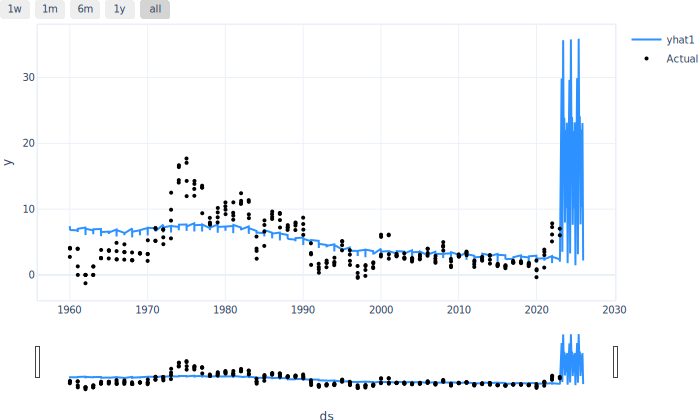

In [ ]:
aus_cpi_forecast_visual = aus_cpi_model.plot(aus_cpi_forecast)

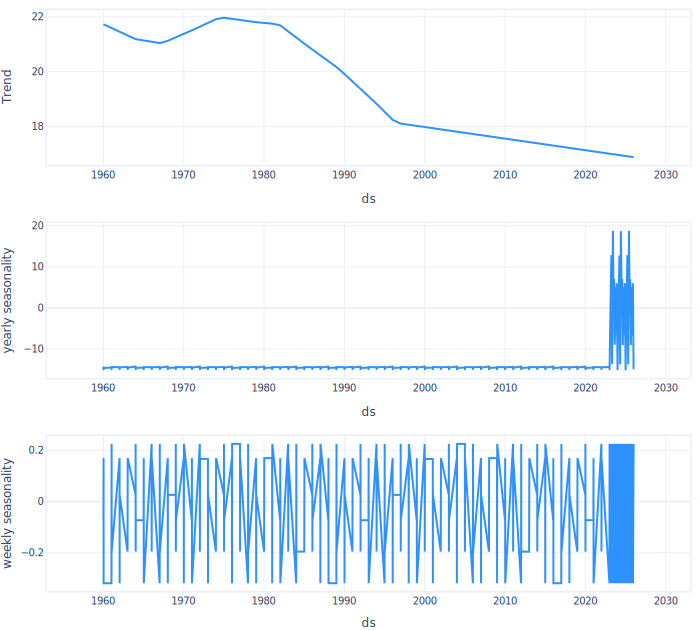

In [ ]:
trends_seasons = aus_cpi_model.plot_components(aus_cpi_forecast)

# Using External Regressors - next time we perform causal analysis